# NYC Taxi Fare Prediction

In [392]:
from google.cloud import bigquery
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### Import and inspect 2017 data

In [ ]:
query = """
SELECT *
FROM
    nyctaxi-284709.tlc_yellow_trips_2017.tlc_yellow_trips_2017
WHERE
    RAND() < .001
"""

In [137]:
df = bigquery.Client().query(query).to_dataframe()

In [10]:
df.shape

(113400, 17)

In [100]:
df.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000,113416.000000
mean,1.550019,1.626746,2.932810,1.043927,162.953137,160.595736,1.334256,12.990526,0.330141,0.497370,1.840281,0.320667,0.299640,16.283189
std,0.497494,1.264291,3.739482,0.583851,66.609009,70.585379,0.492149,11.507119,0.452801,0.039221,2.525009,1.468368,0.013738,14.124096
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-52.000000,-4.500000,-0.500000,-1.140000,0.000000,-0.300000,-57.300000
25%,1.000000,1.000000,0.980000,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.500000
50%,2.000000,1.000000,1.620000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.350000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.050000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,2.000000,6.000000,73.360000,99.000000,265.000000,265.000000,4.000000,468.800000,4.500000,0.850000,85.950000,55.500000,0.300000,469.100000


In [88]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_fare
0,1,2017-11-22 21:45:39+00:00,2017-11-22 21:48:38+00:00,1,0.40,1,False,125,211,1,4.0,0.5,0.5,1.00,0.00,0.3,6.30,4.00
1,1,2017-08-11 10:41:38+00:00,2017-08-11 10:58:04+00:00,2,1.10,1,False,249,234,1,11.0,0.0,0.5,2.12,0.00,0.3,13.92,11.00
2,2,2017-10-17 08:04:16+00:00,2017-10-17 08:09:04+00:00,6,0.59,1,False,161,161,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,5.00
3,1,2017-09-21 22:44:37+00:00,2017-09-21 23:00:01+00:00,1,2.30,1,False,107,48,1,12.0,0.5,0.5,3.30,0.00,0.3,16.60,12.00
4,1,2017-09-12 10:30:45+00:00,2017-09-12 11:04:09+00:00,1,3.00,1,False,43,164,2,21.0,0.0,0.5,0.00,0.00,0.3,21.80,21.00
5,2,2017-02-01 06:04:19+00:00,2017-02-01 06:19:41+00:00,5,8.84,1,False,236,138,1,24.5,0.0,0.5,3.00,5.54,0.3,33.84,30.04
6,1,2017-01-14 17:30:10+00:00,2017-01-14 17:44:09+00:00,1,3.80,1,False,4,231,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,14.00
7,1,2017-07-12 19:42:45+00:00,2017-07-12 19:58:24+00:00,1,2.20,1,False,163,233,1,11.5,1.0,0.5,2.00,0.00,0.3,15.30,11.50
8,1,2017-03-07 10:55:54+00:00,2017-03-07 11:06:54+00:00,1,1.50,1,False,140,236,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80,9.00
9,1,2017-11-01 14:12:51+00:00,2017-11-01 14:21:01+00:00,1,0.80,1,False,263,141,1,6.5,0.0,0.5,1.00,0.00,0.3,8.30,6.50


### Import and inspect taxi zone geometry data

In [12]:
query_geom = """
SELECT *
FROM
    nyctaxi-284709.taxi_zone_geom.taxi_zone_geom
"""

In [13]:
df_geom = bigquery.Client().query(query_geom).to_dataframe()

In [14]:
df_geom.shape

(263, 4)

In [15]:
df_geom.describe()

,zone_id,zone_name,borough,zone_geom
count,263,263,263,263
unique,260,260,6,263
top,103,Governor's Island/Ellis Island/Liberty Island,Queens,"POLYGON((-74.012554689 40.719069863, -74.01270..."
freq,3,3,69,1


In [16]:
df_geom.head()

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."


Split df into label and features.

In [17]:
df['total_fare'] = df['fare_amount'] + df['tolls_amount']

In [89]:
df.head(20)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_fare
0,1,2017-11-22 21:45:39+00:00,2017-11-22 21:48:38+00:00,1,0.40,1,False,125,211,1,4.0,0.5,0.5,1.00,0.00,0.3,6.30,4.00
1,1,2017-08-11 10:41:38+00:00,2017-08-11 10:58:04+00:00,2,1.10,1,False,249,234,1,11.0,0.0,0.5,2.12,0.00,0.3,13.92,11.00
2,2,2017-10-17 08:04:16+00:00,2017-10-17 08:09:04+00:00,6,0.59,1,False,161,161,2,5.0,0.0,0.5,0.00,0.00,0.3,5.80,5.00
3,1,2017-09-21 22:44:37+00:00,2017-09-21 23:00:01+00:00,1,2.30,1,False,107,48,1,12.0,0.5,0.5,3.30,0.00,0.3,16.60,12.00
4,1,2017-09-12 10:30:45+00:00,2017-09-12 11:04:09+00:00,1,3.00,1,False,43,164,2,21.0,0.0,0.5,0.00,0.00,0.3,21.80,21.00
5,2,2017-02-01 06:04:19+00:00,2017-02-01 06:19:41+00:00,5,8.84,1,False,236,138,1,24.5,0.0,0.5,3.00,5.54,0.3,33.84,30.04
6,1,2017-01-14 17:30:10+00:00,2017-01-14 17:44:09+00:00,1,3.80,1,False,4,231,1,14.0,0.0,0.5,2.00,0.00,0.3,16.80,14.00
7,1,2017-07-12 19:42:45+00:00,2017-07-12 19:58:24+00:00,1,2.20,1,False,163,233,1,11.5,1.0,0.5,2.00,0.00,0.3,15.30,11.50
8,1,2017-03-07 10:55:54+00:00,2017-03-07 11:06:54+00:00,1,1.50,1,False,140,236,2,9.0,0.0,0.5,0.00,0.00,0.3,9.80,9.00
9,1,2017-11-01 14:12:51+00:00,2017-11-01 14:21:01+00:00,1,0.80,1,False,263,141,1,6.5,0.0,0.5,1.00,0.00,0.3,8.30,6.50


## Plot total fare (fare + tolls) vs trip distance

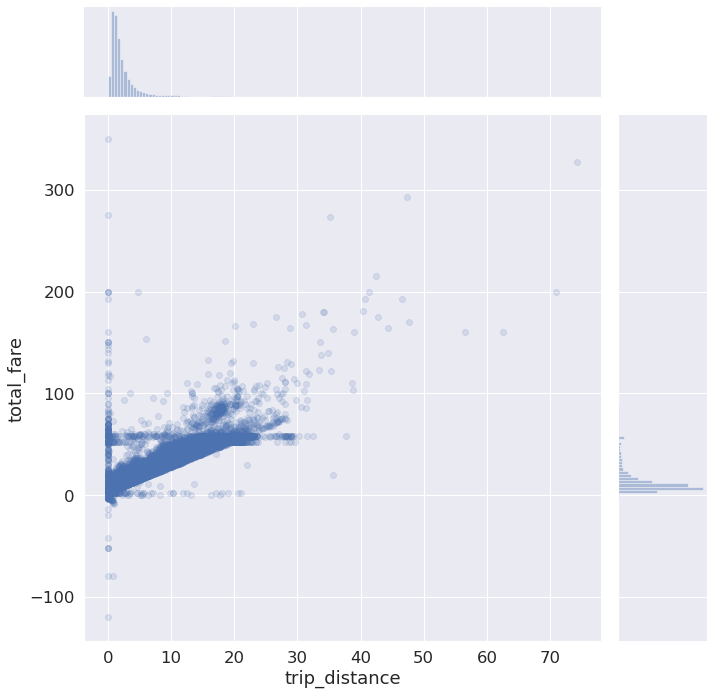

In [18]:
sns.set(font_scale=1.5)
sns.jointplot(df['trip_distance'], df['total_fare'],  height = 10, alpha = .15, marginal_kws = dict(bins=150))

Remove trips with very small or negative fare, trips of small distance, and trips to JFK

In [63]:
exclude_small_distances = df['trip_distance'] > .25
exclude_small_fares = (df['total_fare'] >= 3)
exclude_nonstandard_ratecode = (df['RatecodeID'] == 1)
exclude_small_faretodistance_ratio = (df['total_fare']/df['trip_distance'] > 2)

df_cleaned = df[exclude_small_distances & exclude_small_fares & exclude_nonstandard_ratecode & exclude_small_faretodistance_ratio]
                                                                                                                     
                                                                                                                     

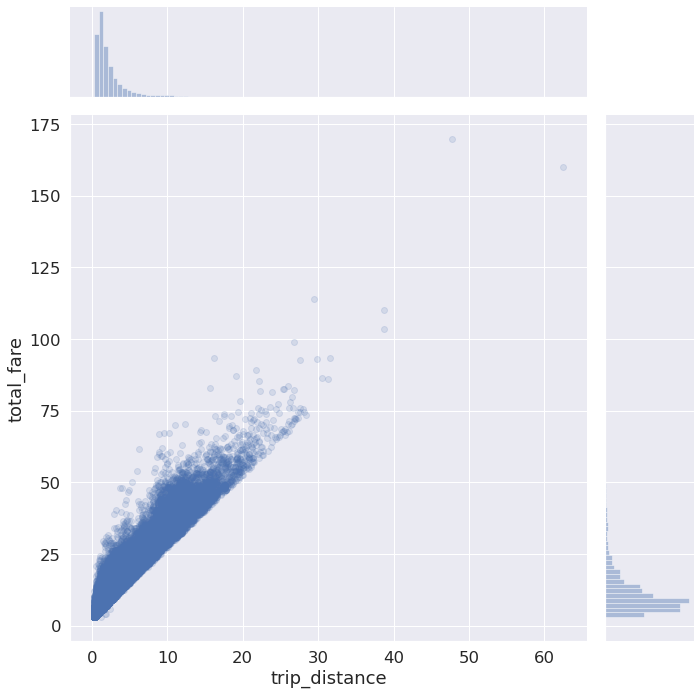

In [38]:
sns.jointplot(df_cleaned['trip_distance'], df_cleaned['total_fare'],  height = 10, alpha = .15, marginal_kws = dict(bins=100))

Bin trip distance and compute fare average for each trip distance. 

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

                     total_fare          
                           mean       std
trip_distance_binned                     
(0.0, 0.25]                 NaN       NaN
(0.25, 0.5]            4.455360  1.173187
(0.5, 0.75]            5.395957  1.335520
(0.75, 1.0]            6.450165  1.577490
(1.0, 1.25]            7.487246  1.786339
...                         ...       ...
(48.5, 48.75]               NaN       NaN
(48.75, 49.0]               NaN       NaN
(49.0, 49.25]               NaN       NaN
(49.25, 49.5]               NaN       NaN
(49.5, 49.75]               NaN       NaN

[199 rows x 2 columns]


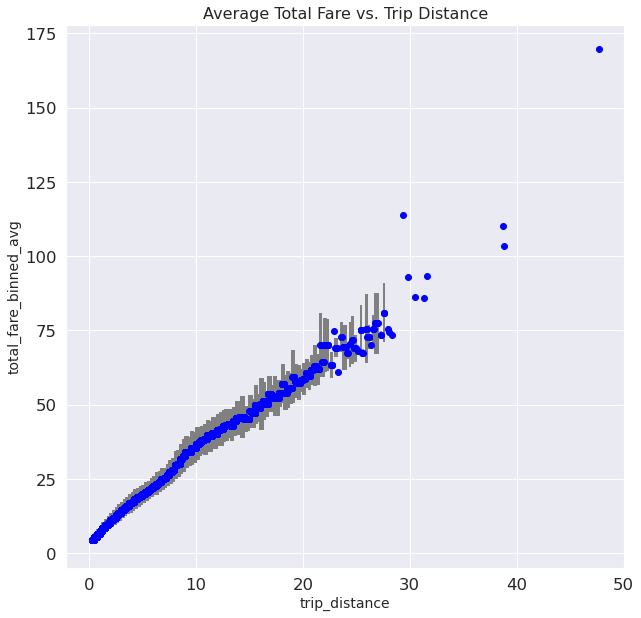

In [64]:
# bin in .25 mile intervals of distance
distance_bins = [.25* i for i in range(int(50/.25))]
df_cleaned['trip_distance_binned'] = pd.cut(df_cleaned['trip_distance'], distance_bins)

# compute mean and std of total fare over trip distance bins, add them as new columns
df_temp = df_cleaned[['trip_distance_binned', 'total_fare']].groupby('trip_distance_binned').agg({'total_fare': ['mean', 'std']})
mean_std_dict = df_temp['total_fare'][['mean', 'std']].to_dict()
df_cleaned['total_fare_binned_avg'] = df_cleaned['trip_distance_binned'].map(mean_std_dict['mean'])
df_cleaned['total_fare_binned_std'] = df_cleaned['trip_distance_binned'].map(mean_std_dict['std'])
print(df_temp)

fig, ax = plt.subplots(figsize=(10,10))
plt.errorbar(df_cleaned['trip_distance'], df_cleaned['total_fare_binned_avg'], yerr = df_cleaned['total_fare_binned_std'], fmt='o', color='blue',
             ecolor='gray', elinewidth=2)
plt.xlabel('trip_distance', fontsize=14)
plt.ylabel('total_fare_binned_avg', fontsize=14)
plt.title('Average Total Fare vs. Trip Distance', fontsize=16)
plt.show()

In [40]:
df_cleaned.head(100)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_fare,trip_distance_binned,total_fare_binned_avg,total_fare_binned_std
0,1,2017-11-22 21:45:39+00:00,2017-11-22 21:48:38+00:00,1,0.40,1,False,125,211,1,...,0.5,0.5,1.00,0.0,0.3,6.30,4.0,"(0.25, 0.5]",4.455360,1.173187
1,1,2017-08-11 10:41:38+00:00,2017-08-11 10:58:04+00:00,2,1.10,1,False,249,234,1,...,0.0,0.5,2.12,0.0,0.3,13.92,11.0,"(1.0, 1.25]",7.487246,1.786339
2,2,2017-10-17 08:04:16+00:00,2017-10-17 08:09:04+00:00,6,0.59,1,False,161,161,2,...,0.0,0.5,0.00,0.0,0.3,5.80,5.0,"(0.5, 0.75]",5.395957,1.335520
3,1,2017-09-21 22:44:37+00:00,2017-09-21 23:00:01+00:00,1,2.30,1,False,107,48,1,...,0.5,0.5,3.30,0.0,0.3,16.60,12.0,"(2.25, 2.5]",11.989269,2.433121
4,1,2017-09-12 10:30:45+00:00,2017-09-12 11:04:09+00:00,1,3.00,1,False,43,164,2,...,0.0,0.5,0.00,0.0,0.3,21.80,21.0,"(2.75, 3.0]",13.689303,2.732729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2,2017-11-08 11:52:15+00:00,2017-11-08 12:08:13+00:00,1,1.06,1,False,48,163,1,...,0.0,0.5,2.26,0.0,0.3,13.56,10.5,"(1.0, 1.25]",7.487246,1.786339
99,1,2017-11-23 22:40:18+00:00,2017-11-23 22:48:16+00:00,1,1.80,1,False,151,239,1,...,0.5,0.5,1.85,0.0,0.3,11.15,8.0,"(1.75, 2.0]",10.297568,2.174493
100,2,2017-11-24 09:07:09+00:00,2017-11-24 09:14:50+00:00,2,1.09,1,False,43,142,1,...,0.0,0.5,1.56,0.0,0.3,9.36,7.0,"(1.0, 1.25]",7.487246,1.786339
101,1,2017-10-09 20:10:13+00:00,2017-10-09 20:18:42+00:00,1,1.30,1,False,234,79,2,...,0.5,0.5,0.00,0.0,0.3,8.30,7.0,"(1.25, 1.5]",8.488200,1.944808


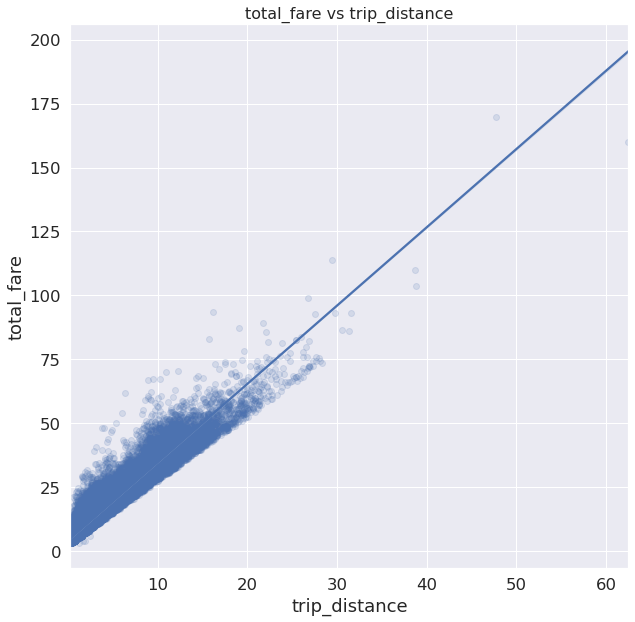

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.regplot(x = df_cleaned['trip_distance'], y = df_cleaned['total_fare'], scatter_kws={'alpha':0.15})
plt.title('total_fare vs trip_distance', fontsize = 16)
plt.show()

Trip distance not actually known beforehand since it may depend on traffic so we have to use some surrogate, such as Haversine, distance in our benchmark model. But this shows that on the whole, trip distance is a strong predictor of fare. So if there is a way to predict trip distance based on start and end points, time of day, and time year, we can predict trip distance and use this predicted value as a feature in predicting fare.  

## Baseline Model: Linear Regression of Total Fare against Haversine Distance (as the crow flies)

For a baseline model to predict total fare, let's perform a linear regression of total fare against Haversine distance (distance as the crow flies between pickup and dropoff). Unlike trip distance, Haversine distance can be known in advance of the trip based purely on the pickup and dropoff point, and constitutes a legitimate feature for prediction. However, we should expect it to be informative than trip distance as to the fare, since fare depends more directly on actual trip distance rather than the straightline distance between PU and DO points. 

Before we can apply this function to each trip, we need to get the PU and DO (latitude, longitude) pair for each trip. We need to pull this in from the taxi_zone_geom dataframe. 

In [24]:
df_geom

,zone_id,zone_name,borough,zone_geom
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -..."
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8..."
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -..."
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -..."
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -..."
...,...,...,...,...
258,206,Saint George/New Brighton,Staten Island,"POLYGON((-74.0825658580711 40.6483158193535, -..."
259,214,South Beach/Dongan Hills,Staten Island,"POLYGON((-74.085787808 40.5958840799999, -74.0..."
260,221,Stapleton,Staten Island,"POLYGON((-74.076017768 40.6377481049999, -74.0..."
261,245,West Brighton,Staten Island,"POLYGON((-74.0992883379999 40.640204723, -74.0..."


In [25]:
def calculate_center(bounding_polygon):
    
    # remove everything but list of coords from input string
    if bounding_polygon[0] == 'P':
        polygon = bounding_polygon[len('POLYGON(('):-2]
        coords_list = polygon.split(', ')
        coords_list = [coords_list[i].split(' ') for i in range(len(coords_list))]
    elif bounding_polygon[0] == 'M':
        multi_polygon = bounding_polygon[len('MULTIPOLYGON((('):-3]
        polygon_list = multi_polygon.split(')), ((')
        #print(polygon_list)
        coords_list = []
        for polygon in polygon_list: 
            coords_list_poly = polygon.split(', ')
            coords_list_poly = [coords_list_poly[i].split(' ') for i in range(len(coords_list_poly))]
            #print('')
            #print(coords_list_poly)
            coords_list = coords_list + coords_list_poly
    
    #print(coords_list)
    L = len(coords_list)
    #print('len: ' + str(L))
    
    # extract lats and longs and take their average
    lats = [float(coords_list[i][0]) for i in range(len(coords_list))]
    longs = [float(coords_list[i][1]) for i in range(len(coords_list))]
    center = (sum(lats)/float(L), sum(longs)/float(L))
    
    return center

In [41]:
df_geom['zone_center'] = df_geom['zone_geom'].apply(calculate_center)
#type(df_geom['zone_center'].iloc[0][0])

In [42]:
# check that center was computed correctly
df_geom

,zone_id,zone_name,borough,zone_geom,zone_center
0,1,Newark Airport,EWR,"POLYGON((-74.1856319999999 40.6916479999999, -...","(-74.17427535775865, 40.690228870689594)"
1,3,Allerton/Pelham Gardens,Bronx,"POLYGON((-73.848596761 40.8716707849999, -73.8...","(-73.84651540567761, 40.8642967537024)"
2,18,Bedford Park,Bronx,"POLYGON((-73.8844286139999 40.8668003789999, -...","(-73.88938126119521, 40.868880006249874)"
3,20,Belmont,Bronx,"POLYGON((-73.8839239579998 40.8644177609999, -...","(-73.88536667248478, 40.85894201853527)"
4,31,Bronx Park,Bronx,"POLYGON((-73.8710017319999 40.8572767429999, -...","(-73.87512441628562, 40.860310446928466)"
...,...,...,...,...,...
258,206,Saint George/New Brighton,Staten Island,"POLYGON((-74.0825658580711 40.6483158193535, -...","(-74.09994085712476, 40.64055727189237)"
259,214,South Beach/Dongan Hills,Staten Island,"POLYGON((-74.085787808 40.5958840799999, -74.0...","(-74.07929670954616, 40.58392513566909)"
260,221,Stapleton,Staten Island,"POLYGON((-74.076017768 40.6377481049999, -74.0...","(-74.07219368490172, 40.62045818072949)"
261,245,West Brighton,Staten Island,"POLYGON((-74.0992883379999 40.640204723, -74.0...","(-74.1038056074465, 40.63234571450306)"


In [43]:
df_cleaned.head(100)

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,total_fare,trip_distance_binned,total_fare_binned_avg,total_fare_binned_std
0,1,2017-11-22 21:45:39+00:00,2017-11-22 21:48:38+00:00,1,0.40,1,False,125,211,1,...,0.5,0.5,1.00,0.0,0.3,6.30,4.0,"(0.25, 0.5]",4.455360,1.173187
1,1,2017-08-11 10:41:38+00:00,2017-08-11 10:58:04+00:00,2,1.10,1,False,249,234,1,...,0.0,0.5,2.12,0.0,0.3,13.92,11.0,"(1.0, 1.25]",7.487246,1.786339
2,2,2017-10-17 08:04:16+00:00,2017-10-17 08:09:04+00:00,6,0.59,1,False,161,161,2,...,0.0,0.5,0.00,0.0,0.3,5.80,5.0,"(0.5, 0.75]",5.395957,1.335520
3,1,2017-09-21 22:44:37+00:00,2017-09-21 23:00:01+00:00,1,2.30,1,False,107,48,1,...,0.5,0.5,3.30,0.0,0.3,16.60,12.0,"(2.25, 2.5]",11.989269,2.433121
4,1,2017-09-12 10:30:45+00:00,2017-09-12 11:04:09+00:00,1,3.00,1,False,43,164,2,...,0.0,0.5,0.00,0.0,0.3,21.80,21.0,"(2.75, 3.0]",13.689303,2.732729
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98,2,2017-11-08 11:52:15+00:00,2017-11-08 12:08:13+00:00,1,1.06,1,False,48,163,1,...,0.0,0.5,2.26,0.0,0.3,13.56,10.5,"(1.0, 1.25]",7.487246,1.786339
99,1,2017-11-23 22:40:18+00:00,2017-11-23 22:48:16+00:00,1,1.80,1,False,151,239,1,...,0.5,0.5,1.85,0.0,0.3,11.15,8.0,"(1.75, 2.0]",10.297568,2.174493
100,2,2017-11-24 09:07:09+00:00,2017-11-24 09:14:50+00:00,2,1.09,1,False,43,142,1,...,0.0,0.5,1.56,0.0,0.3,9.36,7.0,"(1.0, 1.25]",7.487246,1.786339
101,1,2017-10-09 20:10:13+00:00,2017-10-09 20:18:42+00:00,1,1.30,1,False,234,79,2,...,0.5,0.5,0.00,0.0,0.3,8.30,7.0,"(1.25, 1.5]",8.488200,1.944808


In [65]:
# join zone_center to df_cleaned
df_geom['zone_id'] = df_geom['zone_id'].astype(str).astype(int)
df_cleaned = pd.merge(df_cleaned, df_geom, how = 'left', left_on = 'PULocationID', right_on = 'zone_id')
df_cleaned = df_cleaned.rename(columns={"zone_id": "PU_zone_ID", "zone_name": "PU_zone_name", "borough": "PU_zone_borough", "zone_geom": "PU_zone_geom", "zone_center": "PU_zone_center"})
df_cleaned = pd.merge(df_cleaned, df_geom, how = 'left', left_on = 'DOLocationID', right_on = 'zone_id')
df_cleaned = df_cleaned.rename(columns={"zone_id": "DO_zone_ID", "zone_name": "DO_zone_name", "borough": "DO_zone_borough", "zone_geom": "DO_zone_geom", "zone_center": "DO_zone_center"})





In [59]:
df_cleaned.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,...,PU_zone_ID,PU_zone_name,PU_zone_borough,PU_zone_geom,PU_zone_center,DO_zone_ID,DO_zone_name,DO_zone_borough,DO_zone_geom,DO_zone_center
0,1,2017-11-22 21:45:39+00:00,2017-11-22 21:48:38+00:00,1,0.40,1,False,125,211,1,...,125.0,Hudson Sq,Manhattan,"POLYGON((-74.0028172659999 40.7283631289999, -...","(-74.00891771901506, 40.725760671245304)",211.0,SoHo,Manhattan,"POLYGON((-74.0014245099999 40.7199371979999, -...","(-74.00218795025636, 40.72351427192298)"
1,1,2017-08-11 10:41:38+00:00,2017-08-11 10:58:04+00:00,2,1.10,1,False,249,234,1,...,249.0,West Village,Manhattan,"POLYGON((-74.002203373 40.7296532559999, -74.0...","(-74.00307408540469, 40.73382586645229)",234.0,Union Sq,Manhattan,"POLYGON((-73.9899776669999 40.7349792549999, -...","(-73.99013101759174, 40.739311150122354)"
2,2,2017-10-17 08:04:16+00:00,2017-10-17 08:09:04+00:00,6,0.59,1,False,161,161,2,...,161.0,Midtown Center,Manhattan,"POLYGON((-73.9748872719999 40.7559237909999, -...","(-73.97733755281567, 40.75776913971043)",161.0,Midtown Center,Manhattan,"POLYGON((-73.9748872719999 40.7559237909999, -...","(-73.97733755281567, 40.75776913971043)"
3,1,2017-09-21 22:44:37+00:00,2017-09-21 23:00:01+00:00,1,2.30,1,False,107,48,1,...,107.0,Gramercy,Manhattan,"POLYGON((-73.982322826 40.7314978899999, -73.9...","(-73.98426808939277, 40.73670769532132)",48.0,Clinton East,Manhattan,"POLYGON((-73.9907263629999 40.7559504059999, -...","(-73.99073528001917, 40.76141002298066)"
4,1,2017-09-12 10:30:45+00:00,2017-09-12 11:04:09+00:00,1,3.00,1,False,43,164,2,...,43.0,Central Park,Manhattan,"POLYGON((-73.972098524 40.7655172509999, -73.9...","(-73.96649423548082, 40.78151176399227)",164.0,Midtown South,Manhattan,"POLYGON((-73.983174119 40.7445603109999, -73.9...","(-73.98473677148775, 40.74854701699989)"


In [60]:
df_cleaned.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'store_and_fwd_flag',
       'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra',
       'mta_tax', 'tip_amount', 'tolls_amount', 'improvement_surcharge',
       'total_amount', 'total_fare', 'trip_distance_binned',
       'total_fare_binned_avg', 'total_fare_binned_std', 'PU_zone_ID',
       'PU_zone_name', 'PU_zone_borough', 'PU_zone_geom', 'PU_zone_center',
       'DO_zone_ID', 'DO_zone_name', 'DO_zone_borough', 'DO_zone_geom',
       'DO_zone_center'],
      dtype='object')

In [112]:
# remove rows where PU and DO zone centers are NA
shape_init = df_cleaned.shape
df_cleaned = df_cleaned[df_cleaned['PU_zone_center'].notna() & df_cleaned['DO_zone_center'].notna()]
df_cleaned = df_cleaned.reset_index()
shape_new = df_cleaned.shape
num_rows_removed = shape_init[0] - shape_new[0]
print('num_rows_removed: ' +str(num_rows_removed))

num_rows_removed: 0


In [113]:
# function to compute Haversine distance in miles based on lat/long of PU and DO points. taken from 
# https://stackoverflow.com/questions/19412462/getting-distance-between-two-points-based-on-latitude-longitude#:~:text=Install%20it%20via%20pip%20install,were%20looking%20for%20dist%20%3D%20mpu.
def haversine_distance(row):
    from math import sin, cos, sqrt, atan2, radians

    # approximate radius of earth in miles
    R = 3960
    
    PU = row['PU_zone_center']
    DO = row['DO_zone_center']
    
    #print('PU: ' + str(PU))
    #print('DO: ' + str(DO))
    
    #print('PU[0], type(PU[0]): ' + str(PU[0]) + ', ' + str(type(PU[0])))
    #print('PU[1], type(PU[1]): ' + str(PU[1]) + ', ' + str(type(PU[1])))
    #print('DO[0], type(DO[0]): ' + str(DO[0]) + ', ' + str(type(DO[0])))
    #print('DO[1], type(DO[1]): ' + str(DO[1]) + ', ' + str(type(DO[1])))
    
    lat1 = radians(PU[0])
    lon1 = radians(PU[1])
    lat2 = radians(DO[0])
    lon2 = radians(DO[1])

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c
    
    return distance

In [70]:
df_cleaned['PU_DO_straightline_distance'] = df_cleaned.apply(lambda row: haversine_distance(row), axis=1)



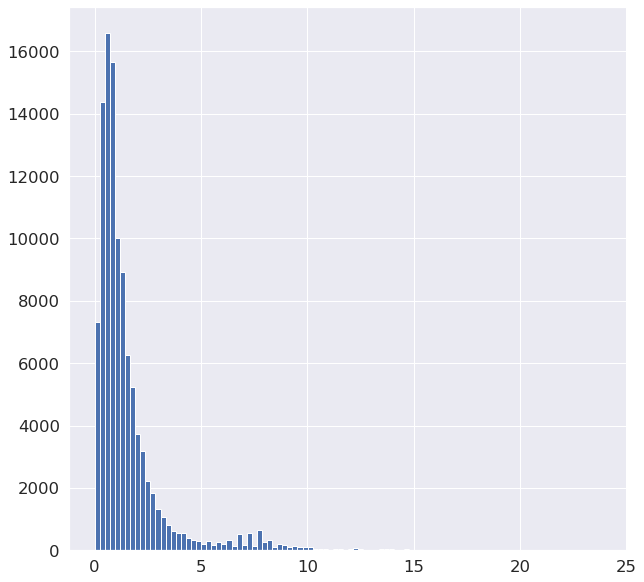

In [75]:
df_cleaned['PU_DO_straightline_distance'].hist(bins=100, figsize=(10,10))

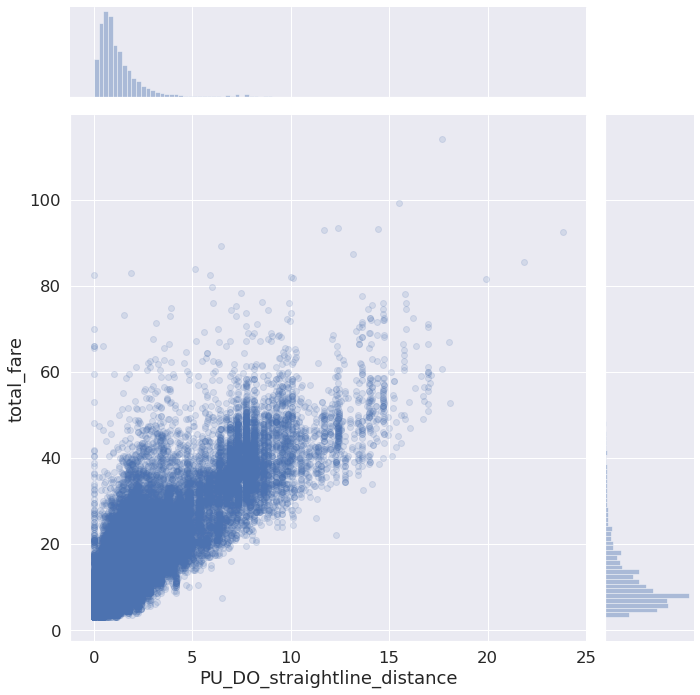

In [76]:
sns.jointplot(df_cleaned['PU_DO_straightline_distance'], df_cleaned['total_fare'],  height = 10, alpha = .15, marginal_kws = dict(bins=100))

                                   total_fare          
                                         mean       std
PU_DO_straightline_distance_binned                     
(0.0, 0.25]                          6.651167  2.367099
(0.25, 0.5]                          7.175022  2.775732
(0.5, 0.75]                          8.231288  3.475952
(0.75, 1.0]                          9.260787  4.029827
(1.0, 1.25]                          9.750066  4.186951
...                                       ...       ...
(48.5, 48.75]                             NaN       NaN
(48.75, 49.0]                             NaN       NaN
(49.0, 49.25]                             NaN       NaN
(49.25, 49.5]                             NaN       NaN
(49.5, 49.75]                             NaN       NaN

[199 rows x 2 columns]


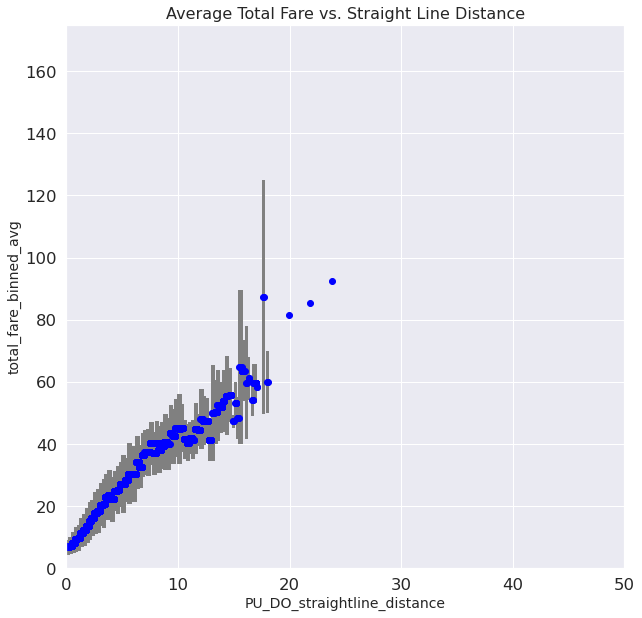

In [79]:
# bin in .25 mile intervals of distance
distance_bins = [.25* i for i in range(int(50/.25))]
df_cleaned['PU_DO_straightline_distance_binned'] = pd.cut(df_cleaned['PU_DO_straightline_distance'], distance_bins)

# compute mean and std of total fare over trip distance bins, add them as new columns
df_temp = df_cleaned[['PU_DO_straightline_distance_binned', 'total_fare']].groupby('PU_DO_straightline_distance_binned').agg({'total_fare': ['mean', 'std']})
mean_std_dict = df_temp['total_fare'][['mean', 'std']].to_dict()
df_cleaned['total_fare_binned_avg'] = df_cleaned['PU_DO_straightline_distance_binned'].map(mean_std_dict['mean'])
df_cleaned['total_fare_binned_std'] = df_cleaned['PU_DO_straightline_distance_binned'].map(mean_std_dict['std'])
print(df_temp)

fig, ax = plt.subplots(figsize=(10,10))
plt.errorbar(df_cleaned['PU_DO_straightline_distance'], df_cleaned['total_fare_binned_avg'], yerr = df_cleaned['total_fare_binned_std'], fmt='o', color='blue',
             ecolor='gray', elinewidth=2)
plt.xlabel('PU_DO_straightline_distance', fontsize=14)
plt.xlim(0,50)
plt.ylim(0,175)
plt.ylabel('total_fare_binned_avg', fontsize=14)
plt.title('Average Total Fare vs. Straight Line Distance', fontsize=16)
plt.show()

Unlike earlier plot vs trip distance, there are no trips greater than 25 miles when we plot vs straightline distance. This could be because the > 25 mile trips took a very circuitous route, or because the PI/DO locations were not ID'd and so were removed prior to calculation of straightline distnace. 

As expected, the uncertainty bars when plotting vs straightline distance rather than trip distance are larger, and the relationship less linear. The rate of fare increase with straightline distance starts to fall off with larger distance, after about 10 miles. Still, a linear model should be a good first approximation to work with as a baseline model. 

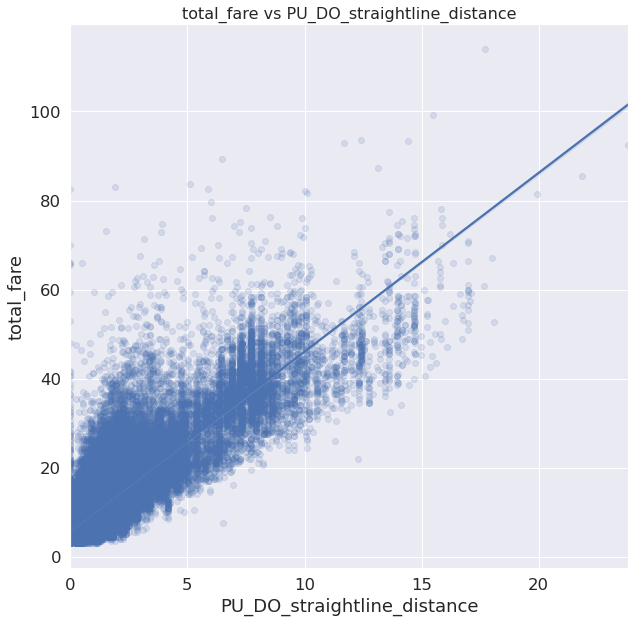

In [81]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.regplot(x = df_cleaned['PU_DO_straightline_distance'], y = df_cleaned['total_fare'], scatter_kws={'alpha':0.15})
plt.title('total_fare vs PU_DO_straightline_distance', fontsize = 16)
plt.show()

### Evaluation of Baseline Model on 2018 Data (Validation Set)

In [114]:
df_cleaned['PU_DO_straightline_distance'].shape

(107288,)

In [115]:
df_cleaned.index

RangeIndex(start=0, stop=107288, step=1)

In [116]:
df_cleaned['PU_DO_straightline_distance'].describe

<bound method NDFrame.describe of 0         0.467092
1         0.900646
2         0.000000
3         0.649299
4         1.408992
            ...   
107283    0.268952
107284    0.445232
107285    0.429310
107286    5.051294
107287    1.232163
Name: PU_DO_straightline_distance, Length: 107288, dtype: float64>

In [117]:
df_cleaned['total_fare'].shape

(107288,)

In [118]:
df_cleaned['PU_DO_straightline_distance']


0         0.467092
1         0.900646
2         0.000000
3         0.649299
4         1.408992
            ...   
107283    0.268952
107284    0.445232
107285    0.429310
107286    5.051294
107287    1.232163
Name: PU_DO_straightline_distance, Length: 107288, dtype: float64

In [121]:
from sklearn.linear_model import LinearRegression

X = df_cleaned['PU_DO_straightline_distance'].values.reshape(-1,1)
y = df_cleaned['total_fare']

linear_regression_model = LinearRegression().fit(X, y)

In [123]:
linear_regression_model.coef_

array([4.0137504])

In [124]:
linear_regression_model.intercept_

5.9146124247867675

In [127]:
linear_regression_model.score(X,y)

0.7026931690633003

In [130]:
from sklearn.metrics import mean_squared_error

train_rmse = mean_squared_error(linear_regression_model.predict(X), y, squared = False)

4.845076172497285

In [177]:
import numpy as np

def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def smape(y_true, y_pred):
    return 100/len(y_true) * np.sum(2 * np.abs(y_pred - y_true) / (np.abs(y_true) + np.abs(y_pred)))


train_mape = mape(linear_regression_model.predict(X), y)
print('train_mape: ' + str(train_mape))
train_smape = smape(linear_regression_model.predict(X), y)
print('train_smape: ' + str(train_smape))

train_mape: 29.504621552976
train_smape: 29.039732918023738


### Validate on 2018 Data

Import 2018 and prep 2018 data for prediction.

In [131]:
query = """
SELECT *
FROM
    nyctaxi-284709.tlc_yellow_trips_2018.tlc_yellow_trips_2018
WHERE
    RAND() < .001
"""

In [133]:
df_val = bigquery.Client().query(query).to_dataframe()

In [136]:
df_val.shape

(102498, 17)

In [143]:
df_val.describe()

,VendorID,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount
count,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000,102841.000000
mean,1.590484,1.598088,2.923957,1.052246,162.897395,161.298432,1.314719,12.988180,0.333842,0.496976,1.866828,0.341411,0.299414,16.330403
std,0.521739,1.244345,3.760845,0.868259,66.452907,70.336519,0.485634,11.553203,0.469987,0.043774,2.530121,1.552540,0.018155,14.244437
min,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,-96.000000,-4.500000,-0.500000,0.000000,0.000000,-0.300000,-96.800000
25%,1.000000,1.000000,0.970000,1.000000,114.000000,107.000000,1.000000,6.500000,0.000000,0.500000,0.000000,0.000000,0.300000,8.600000
50%,2.000000,1.000000,1.600000,1.000000,162.000000,162.000000,1.000000,9.500000,0.000000,0.500000,1.400000,0.000000,0.300000,11.800000
75%,2.000000,2.000000,3.000000,1.000000,233.000000,233.000000,2.000000,14.500000,0.500000,0.500000,2.450000,0.000000,0.300000,17.800000
max,4.000000,6.000000,57.010000,99.000000,265.000000,265.000000,4.000000,350.000000,18.000000,0.500000,99.000000,100.500000,0.300000,350.300000


In [144]:
df_val['total_fare'] = df_val['fare_amount'] + df_val['tolls_amount']

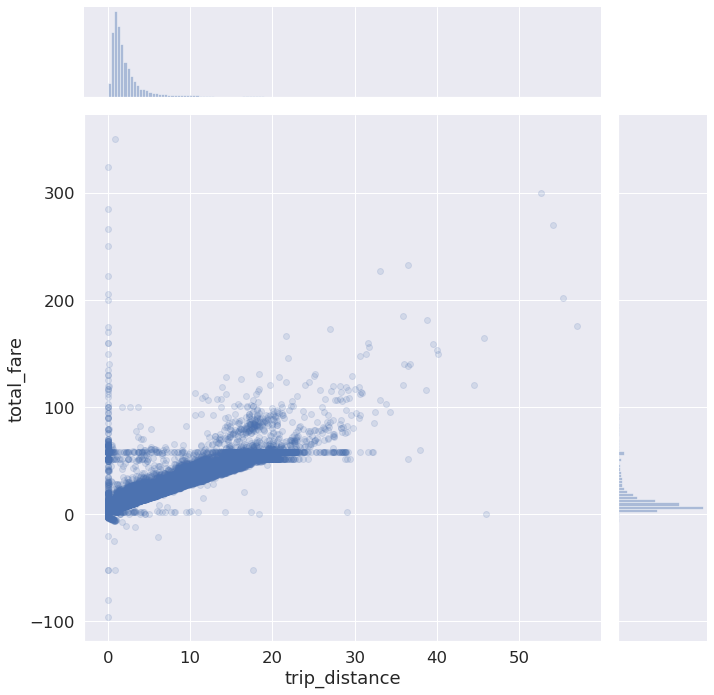

In [146]:
sns.jointplot(df_val['trip_distance'], df_val['total_fare'],  height = 10, alpha = .15, marginal_kws = dict(bins=150))

In [161]:
exclude_small_distances = df_val['trip_distance'] > .25
exclude_small_fares = df_val['total_fare'] >= 3
exclude_nonstandard_ratecode = df_val['RatecodeID'] == 1
exclude_small_faretodistance_ratio = df_val['total_fare']/df_val['trip_distance'] > 2

df_val_cleaned = df_val[exclude_small_distances & exclude_small_fares & exclude_nonstandard_ratecode & exclude_small_faretodistance_ratio]                                                                                                                                                                            


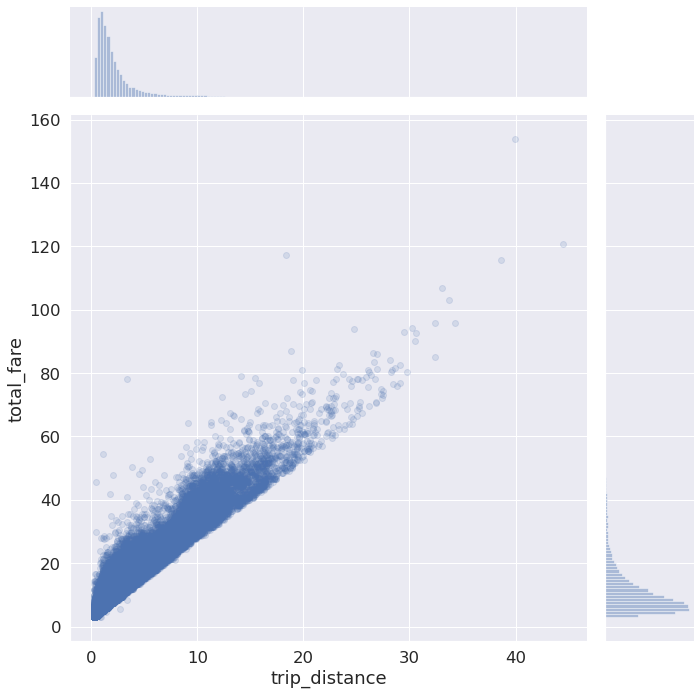

In [162]:
sns.jointplot(df_val_cleaned['trip_distance'], df_val_cleaned['total_fare'],  height = 10, alpha = .15, marginal_kws = dict(bins=150))

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

                     total_fare          
                           mean       std
trip_distance_binned                     
(0.0, 0.25]                 NaN       NaN
(0.25, 0.5]            4.498978  1.358931
(0.5, 0.75]            5.405916  1.331846
(0.75, 1.0]            6.475756  1.587669
(1.0, 1.25]            7.518623  1.902145
...                         ...       ...
(48.5, 48.75]               NaN       NaN
(48.75, 49.0]               NaN       NaN
(49.0, 49.25]               NaN       NaN
(49.25, 49.5]               NaN       NaN
(49.5, 49.75]               NaN       NaN

[199 rows x 2 columns]


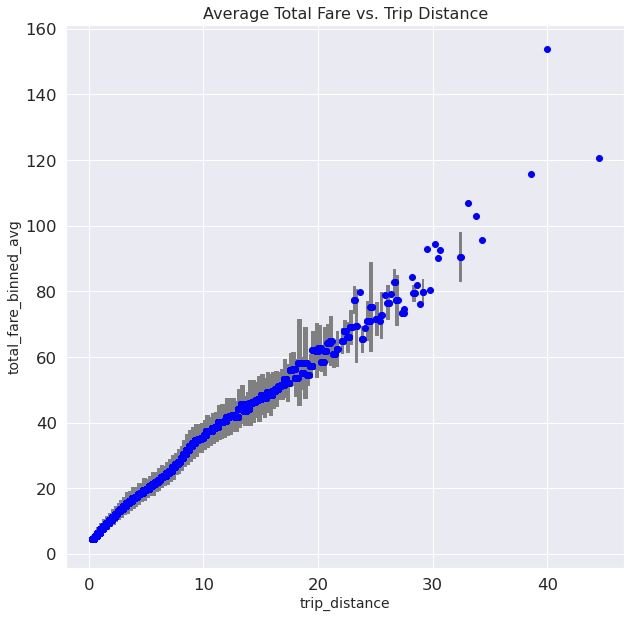

In [163]:
# bin in .25 mile intervals of distance
distance_bins = [.25* i for i in range(int(50/.25))]
df_val_cleaned['trip_distance_binned'] = pd.cut(df_val_cleaned['trip_distance'], distance_bins)

# compute mean and std of total fare over trip distance bins, add them as new columns
df_temp = df_val_cleaned[['trip_distance_binned', 'total_fare']].groupby('trip_distance_binned').agg({'total_fare': ['mean', 'std']})
mean_std_dict = df_temp['total_fare'][['mean', 'std']].to_dict()
df_val_cleaned['total_fare_binned_avg'] = df_val_cleaned['trip_distance_binned'].map(mean_std_dict['mean'])
df_val_cleaned['total_fare_binned_std'] = df_val_cleaned['trip_distance_binned'].map(mean_std_dict['std'])
print(df_temp)

fig, ax = plt.subplots(figsize=(10,10))
plt.errorbar(df_val_cleaned['trip_distance'], df_val_cleaned['total_fare_binned_avg'], yerr = df_val_cleaned['total_fare_binned_std'], fmt='o', color='blue',
             ecolor='gray', elinewidth=2)
plt.xlabel('trip_distance', fontsize=14)
plt.ylabel('total_fare_binned_avg', fontsize=14)
plt.title('Average Total Fare vs. Trip Distance', fontsize=16)
plt.show()

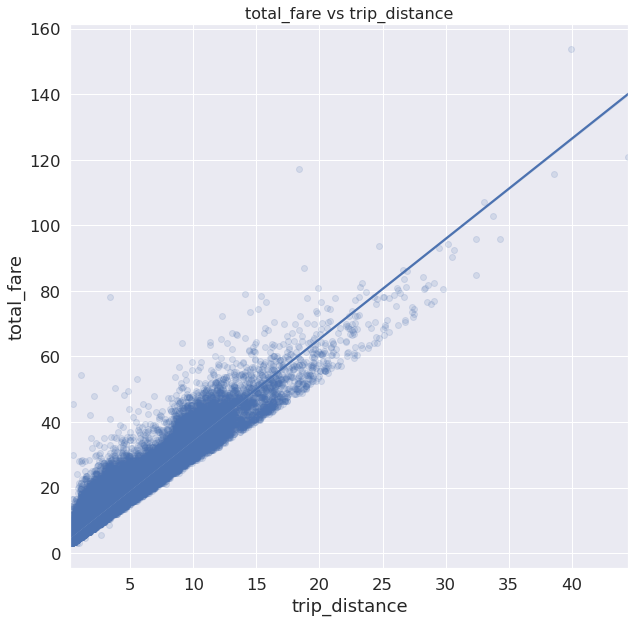

In [164]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.regplot(x = df_val_cleaned['trip_distance'], y = df_val_cleaned['total_fare'], scatter_kws={'alpha':0.15})
plt.title('total_fare vs trip_distance', fontsize = 16)
plt.show()

In [165]:
# join zone_center to df_cleaned
df_geom['zone_id'] = df_geom['zone_id'].astype(str).astype(int)
df_val_cleaned = pd.merge(df_val_cleaned, df_geom, how = 'left', left_on = 'PULocationID', right_on = 'zone_id')
df_val_cleaned = df_val_cleaned.rename(columns={"zone_id": "PU_zone_ID", "zone_name": "PU_zone_name", "borough": "PU_zone_borough", "zone_geom": "PU_zone_geom", "zone_center": "PU_zone_center"})
df_val_cleaned = pd.merge(df_val_cleaned, df_geom, how = 'left', left_on = 'DOLocationID', right_on = 'zone_id')
df_val_cleaned = df_val_cleaned.rename(columns={"zone_id": "DO_zone_ID", "zone_name": "DO_zone_name", "borough": "DO_zone_borough", "zone_geom": "DO_zone_geom", "zone_center": "DO_zone_center"})

In [166]:
# remove rows where PU and DO are NA
shape_init = df_val_cleaned.shape
df_val_cleaned = df_val_cleaned[df_val_cleaned['PU_zone_center'].notna() & df_val_cleaned['DO_zone_center'].notna()]
df_val_cleaned = df_val_cleaned.reset_index()
shape_new = df_val_cleaned.shape
num_rows_removed = shape_init[0] - shape_new[0]
print(num_rows_removed)

1535


In [167]:
df_val_cleaned['PU_DO_straightline_distance'] = df_val_cleaned.apply(lambda row: haversine_distance(row), axis=1)



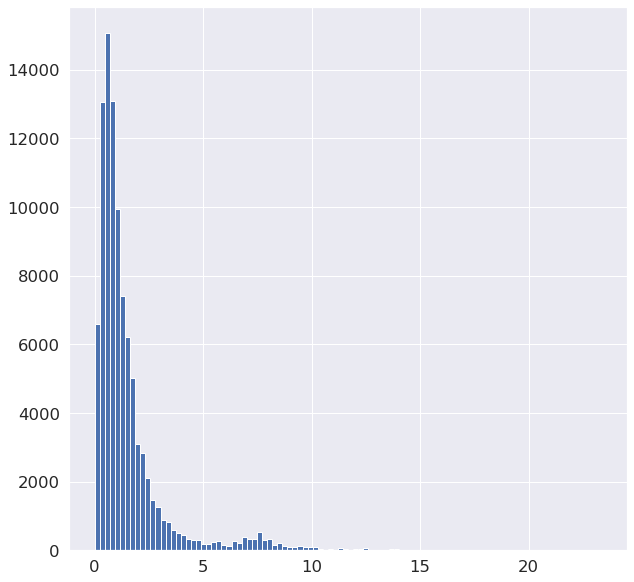

In [168]:
df_val_cleaned['PU_DO_straightline_distance'].hist(bins=100, figsize=(10,10))

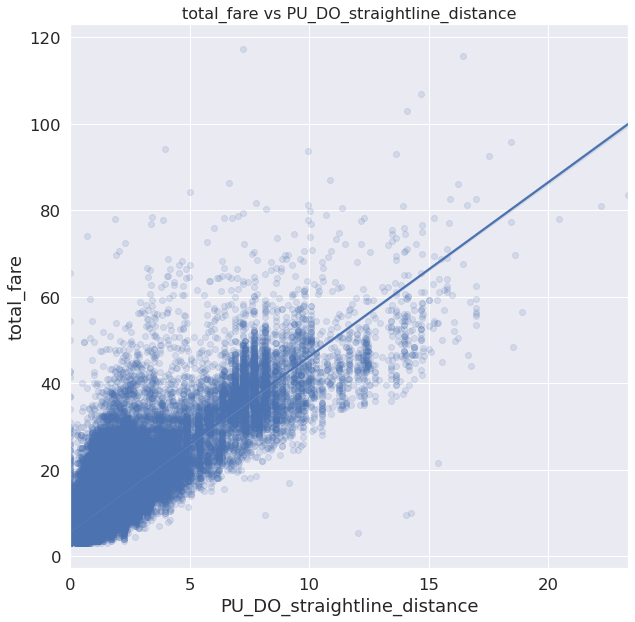

In [169]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10)
sns.regplot(x = df_val_cleaned['PU_DO_straightline_distance'], y = df_val_cleaned['total_fare'], scatter_kws={'alpha':0.15})
plt.title('total_fare vs PU_DO_straightline_distance', fontsize = 16)
plt.show()

                                   total_fare          
                                         mean       std
PU_DO_straightline_distance_binned                     
(0.0, 0.25]                          6.733687  2.352100
(0.25, 0.5]                          7.180770  2.780614
(0.5, 0.75]                          8.227069  3.456679
(0.75, 1.0]                          9.364186  4.181055
(1.0, 1.25]                          9.793050  4.279579
...                                       ...       ...
(48.5, 48.75]                             NaN       NaN
(48.75, 49.0]                             NaN       NaN
(49.0, 49.25]                             NaN       NaN
(49.25, 49.5]                             NaN       NaN
(49.5, 49.75]                             NaN       NaN

[199 rows x 2 columns]


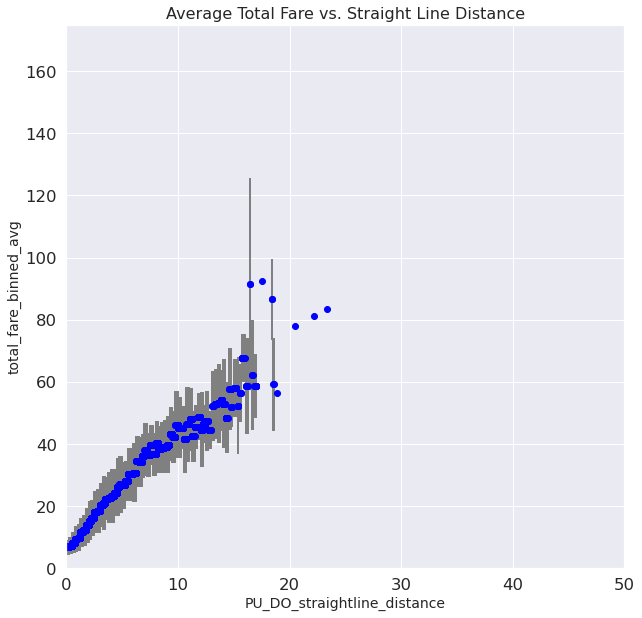

In [171]:
# bin in .25 mile intervals of distance
distance_bins = [.25* i for i in range(int(50/.25))]
df_val_cleaned['PU_DO_straightline_distance_binned'] = pd.cut(df_val_cleaned['PU_DO_straightline_distance'], distance_bins)

# compute mean and std of total fare over trip distance bins, add them as new columns
df_temp = df_val_cleaned[['PU_DO_straightline_distance_binned', 'total_fare']].groupby('PU_DO_straightline_distance_binned').agg({'total_fare': ['mean', 'std']})
mean_std_dict = df_temp['total_fare'][['mean', 'std']].to_dict()
df_val_cleaned['total_fare_binned_avg'] = df_val_cleaned['PU_DO_straightline_distance_binned'].map(mean_std_dict['mean'])
df_val_cleaned['total_fare_binned_std'] = df_val_cleaned['PU_DO_straightline_distance_binned'].map(mean_std_dict['std'])
print(df_temp)

fig, ax = plt.subplots(figsize=(10,10))
plt.errorbar(df_val_cleaned['PU_DO_straightline_distance'], df_val_cleaned['total_fare_binned_avg'], yerr = df_val_cleaned['total_fare_binned_std'], fmt='o', color='blue',
             ecolor='gray', elinewidth=2)
plt.xlabel('PU_DO_straightline_distance', fontsize=14)
plt.xlim(0,50)
plt.ylim(0,175)
plt.ylabel('total_fare_binned_avg', fontsize=14)
plt.title('Average Total Fare vs. Straight Line Distance', fontsize=16)
plt.show()

In [172]:
X_val = df_val_cleaned['PU_DO_straightline_distance'].values.reshape(-1,1)
y_val = df_val_cleaned['total_fare']

In [174]:
val_rmse = mean_squared_error(linear_regression_model.predict(X_val), y_val, squared = False)
val_rmse

4.8707574379477165

This is the number to beat: rmse = 4.8707574379477165

In [176]:


val_mape = mape(linear_regression_model.predict(X_val), y_val)
print('val_mape: ' + str(val_mape))
val_smape = smape(linear_regression_model.predict(X_val), y_val)
print('val_smape: ' + str(val_smape))


val_mape: 29.47948942564838
val_smape: 29.019684608215943


In [396]:



# Create SQL query for 2017, take .1 of the dataset with repeatable splitting using farm fingerprint function
query = """
SELECT
    (
    SELECT ROW_NUMBER() OVER(ORDER BY tpep_pickup_datetime)
    FROM nyctaxi-284709.tlc_yellow_trips_2017.tlc_yellow_trips_2017
    ) AS row,
    fare_amount, 
    trip_distance,
    passenger_count,
    tpep_pickup_datetime,
    PULocationID, 
    DOLocationID,
    RatecodeID, 
    tolls_amount, 
    total_amount
FROM
    nyctaxi-284709.tlc_yellow_trips_2017.tlc_yellow_trips_2017
WHERE
    (
    SELECT
        ABS(MOD(FARM_FINGERPRINT(CAST(ROW_NUMBER() OVER(ORDER BY t.tpep_pickup_datetime) AS STRING)), 10))
    FROM nyctaxi-284709.tlc_yellow_trips_2017.tlc_yellow_trips_2017 AS t
    )
    < .0001
"""

In [397]:
query = """
SELECT
    ABS(MOD(FARM_FINGERPRINT(CAST(ROW_NUMBER() OVER(ORDER BY t.tpep_pickup_datetime) AS STRING)), 10))
FROM nyctaxi-284709.tlc_yellow_trips_2017.tlc_yellow_trips_2017 AS t
"""

In [398]:
#standardSQL
query = """
SELECT
    fare_amount, 
    trip_distance,
    passenger_count,
    tpep_pickup_datetime,
    PULocationID, 
    DOLocationID,
    RatecodeID, 
    tolls_amount, 
    total_amount 
FROM
    `nyctaxi-284709.tlc_yellow_trips_2017.tlc_yellow_trips_2017`
WHERE   
    (
    SELECT
        ABS(MOD(FARM_FINGERPRINT(CAST(ROW_NUMBER() OVER(ORDER BY t.tpep_pickup_datetime) AS STRING)), 10))
    FROM 
        `nyctaxi-284709.tlc_yellow_trips_2017.tlc_yellow_trips_2017` AS t  
    ) < 2    
"""

In [399]:
df = bigquery.Client().query(query).to_dataframe()

KeyboardInterrupt: 

In [29]:
df.columns

Index(['row', 'fare_amount', 'trip_distance', 'passenger_count',
       'tpep_pickup_datetime', 'PULocationID', 'DOLocationID', 'RatecodeID',
       'tolls_amount', 'total_amount'],
      dtype='object')

In [30]:
df.head()

,row,fare_amount,trip_distance,passenger_count,tpep_pickup_datetime,PULocationID,DOLocationID,RatecodeID,tolls_amount,total_amount
0,1,14.0,3.36,1,2017-01-01 00:08:48+00:00,140,146,1,0.0,18.30
1,2,12.0,2.67,3,2017-01-01 00:26:44+00:00,43,162,1,0.0,13.30
2,3,8.0,1.63,4,2017-01-01 00:29:56+00:00,237,263,1,0.0,11.62
3,4,10.5,2.30,3,2017-01-01 00:56:57+00:00,237,236,1,0.0,11.80
4,5,7.5,0.80,1,2017-01-01 00:59:39+00:00,264,264,1,0.0,8.80
